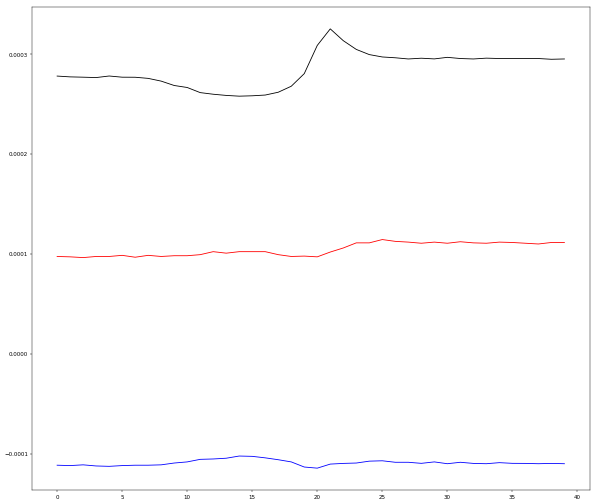

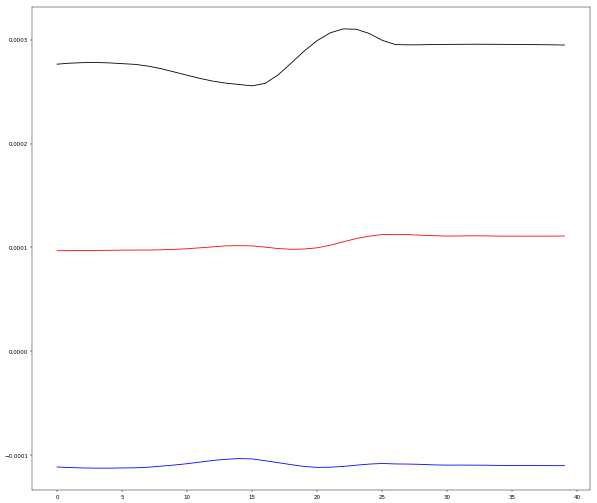

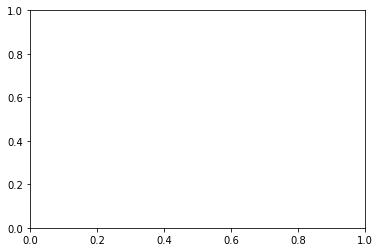

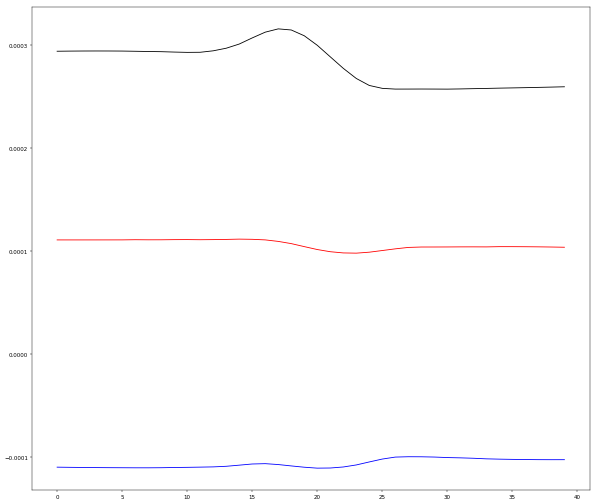

159


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

col_names = ['timestamp', 'X', 'Y', 'Z']
mag_data_reference = pd.read_csv('./reference-fd-bw/mag.csv', names=col_names)

TMP_START = 0
TMP_END = 40

xaxis = list(range(len(mag_data_reference)))[TMP_START:TMP_END]
x_reference = mag_data_reference['X'][TMP_START:TMP_END]
# print(x_reference)
# x_alt = savitzky_golay(list(x_reference), 31, 2)
y_reference = mag_data_reference['Y'][TMP_START:TMP_END]
z_reference = mag_data_reference['Z'][TMP_START:TMP_END]
fig = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, x_reference, color="blue", label="xaxis")
plt.plot(xaxis, y_reference, color="red", label="yaxis")
plt.plot(xaxis, z_reference, color="black", label="zaxis")
plt.show()

TMP_START = 90
TMP_END = 130
x_reference_backward = mag_data_reference['X'][TMP_START:TMP_END]
y_reference_backward = mag_data_reference['Y'][TMP_START:TMP_END]
z_reference_backward = mag_data_reference['Z'][TMP_START:TMP_END]


x_reference = savgol_filter(list(x_reference), 11, 2)
y_reference = savgol_filter(list(y_reference), 11, 2)
z_reference = savgol_filter(list(z_reference), 11, 2)
x_reference_backward = savgol_filter(list(x_reference_backward), 11, 2)
y_reference_backward = savgol_filter(list(y_reference_backward), 11, 2)
z_reference_backward = savgol_filter(list(z_reference_backward), 11, 2)

fig2 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, x_reference, color="blue", label="xaxis")
plt.plot(xaxis, y_reference, color="red", label="yaxis")
plt.plot(xaxis, z_reference, color="black", label="zaxis")
plt.show()
plt.legend()

fig3 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, x_reference_backward, color="blue", label="xaxis")
plt.plot(xaxis, y_reference_backward, color="red", label="yaxis")
plt.plot(xaxis, z_reference_backward, color="black", label="zaxis")
plt.show()
print(len(mag_data_reference['X']))



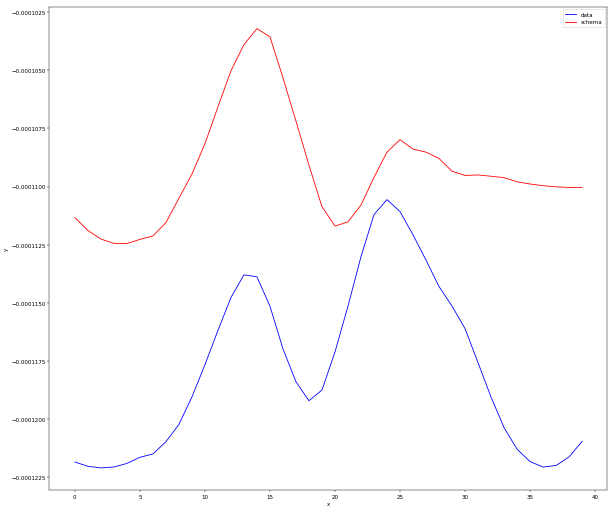

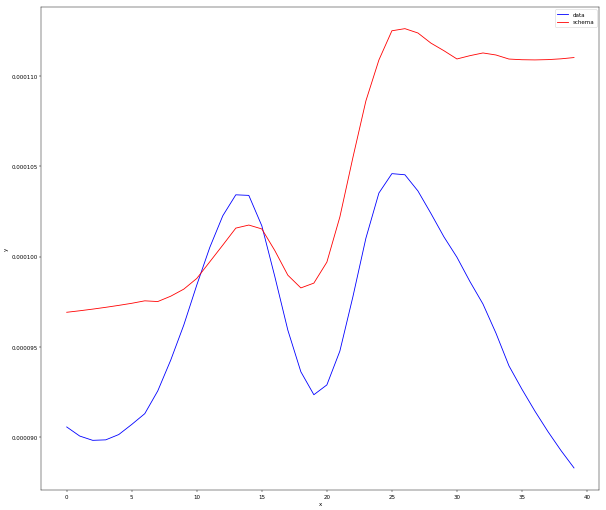

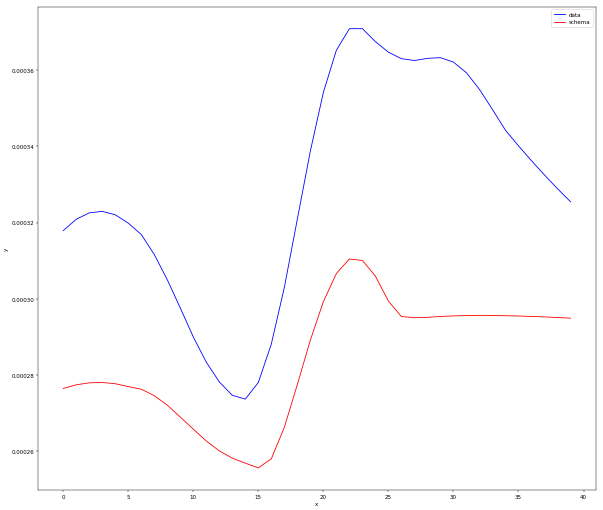

2385


In [22]:
TMP_START = 0
TMP_END = 40

mag_data_forward = pd.read_csv('./amg-forward/mag.csv', names=col_names)
# gyro_data_forward = pd.read_csv('./amg-forward/gyro.csv', names=col_names)
xaxis = list(range(len(mag_data_forward)))[TMP_START:TMP_END]

x_normal = mag_data_forward['X'][TMP_START:TMP_END]
y_normal = mag_data_forward['Y'][TMP_START:TMP_END]
z_normal = mag_data_forward['Z'][TMP_START:TMP_END]

# forward data normalization
x_normal = savgol_filter(list(x_normal), 11, 2)
# x_normal = savgol_filter(list(x_normal), 51, 2)
y_normal = savgol_filter(list(y_normal), 11, 2)
# y_normal = savgol_filter(list(y_normal), 51, 2)
z_normal = savgol_filter(list(z_normal), 11, 2)
# z_normal = savgol_filter(list(z_normal), 21, 2)


fig = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, x_normal, color="blue", label="data")
plt.plot(xaxis, x_reference, color="red", label="schema")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
fig2 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, y_normal, color="blue", label="data")
plt.plot(xaxis, y_reference, color="red", label="schema")
# plt.plot(xaxis, np.rad2deg(z_normal), color="black", label="zaxis")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
fig3 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, z_normal, color="blue", label="data")
plt.plot(xaxis, z_reference, color="red", label="schema")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print(len(mag_data_forward['X']))


In [42]:

%pylab inline
mag_data_forward = pd.read_csv('./amg-forward/mag.csv', names=col_names)
mag_data_backward = pd.read_csv('./amg-backward/mag.csv', names=col_names)

from dtw import dtw
x_normal = mag_data_forward['X']
y_normal = mag_data_forward['Y']
z_normal = mag_data_forward['Z']

x_backward = mag_data_backward['X']
y_backward = mag_data_backward['Y']
z_backward = mag_data_backward['Z']

x_backward = savgol_filter(list(x_backward), 11, 2)
y_backward = savgol_filter(list(y_backward), 11, 2)
z_backward = savgol_filter(list(z_backward), 11, 2)


# forward data normalization
x_normal = savgol_filter(list(x_normal), 11, 2)
y_normal = savgol_filter(list(y_normal), 11, 2)
z_normal = savgol_filter(list(z_normal), 11, 2)


n_backward_x = x_reference_backward
n_backward_y = y_reference_backward
n_backward_z = z_reference_backward
n_x = x_reference
n_y = y_reference
n_z = z_reference
dtw_x_data = []
dtw_y_data = []
dtw_z_data = []
dtw_x_backward_data = []
dtw_y_backward_data = []
dtw_z_backward_data = []
# this simple for loop calculates the similarities between reference model
# and given time-window (ie. from 100 to 250)
dtw_step = 10
print(len(x_backward))
for it in range(0, 1800, dtw_step):

    k_x = x_normal[it:it+40]
    k_y = y_normal[it:it+40]
    k_z = z_normal[it:it+40]
    dist_x, cost_x, *_ = dtw(k_x, n_x, dist=lambda k, n: norm(k - n))
    dist_y, cost_y, *_ = dtw(k_y, n_y, dist=lambda k, n: norm(k - n))
    dist_z, cost_z, *_ = dtw(k_z, n_z, dist=lambda k, n: norm(k - n))
    dtw_x_data.append(mean(cost_x))
    dtw_y_data.append(mean(cost_y))
    dtw_z_data.append(mean(cost_z))
    """ 
    Comment section below to calculate only forward data 
    (reduces computation time)
    """
    k_backward_x = x_backward[it:it+40]
    k_backward_y = y_backward[it:it+40]
    k_backward_z = z_backward[it:it+40]
    dist_backward_x, cost_backward_x, *_ = dtw(k_backward_x, n_backward_x, dist=lambda k, n: norm(k - n))
    dist_backward_y, cost_backward_y, *_ = dtw(k_backward_y, n_backward_y, dist=lambda k, n: norm(k - n))
    dist_backward_z, cost_backward_z, *_ = dtw(k_backward_z, n_backward_z, dist=lambda k, n: norm(k - n))
    dtw_x_backward_data.append(mean(cost_backward_x))
    dtw_y_backward_data.append(mean(cost_backward_y))
    dtw_z_backward_data.append(mean(cost_backward_z))




Populating the interactive namespace from numpy and matplotlib
1824


/home/n3hrox/.pyenv/versions/3.6.1/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['step', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Populating the interactive namespace from numpy and matplotlib


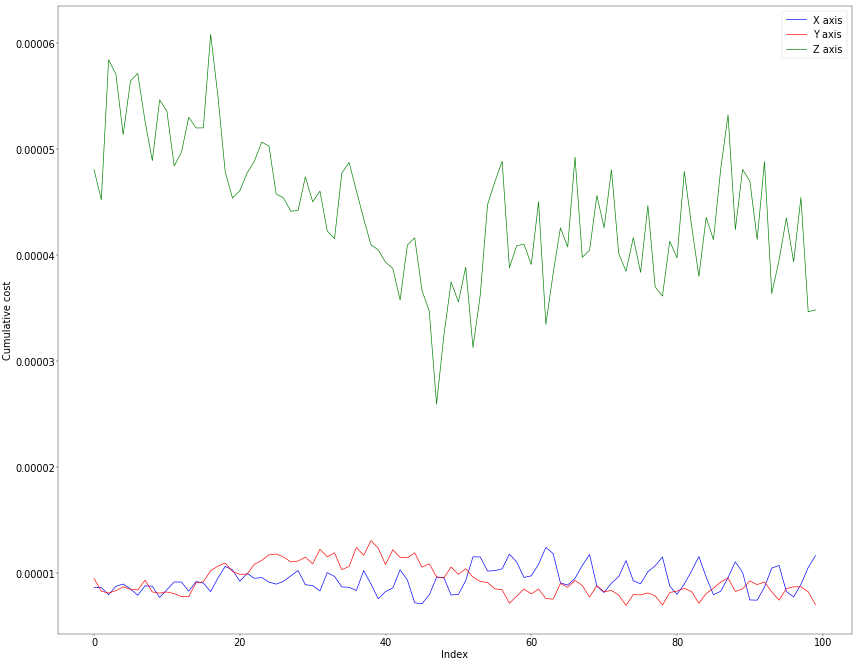

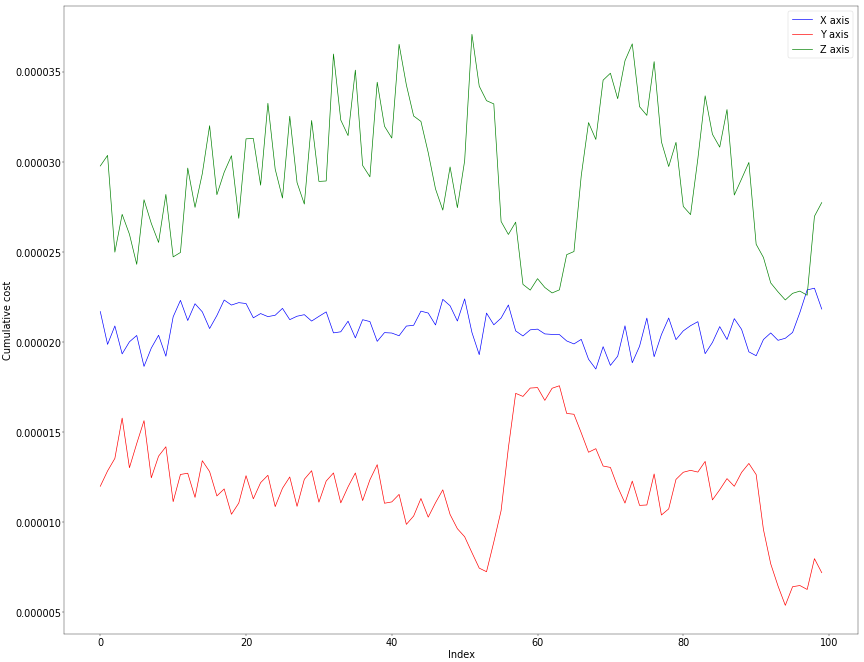

In [43]:
# Plot showing where local minimums are (these are the indexes we are searching for).
# Roughly every 150 indexes there should occur next minimum.
%pylab inline
TMP_START = 0
TMP_END = 100
font = {
    # 'weight': 'bold',
    'size': 22
}
matplotlib.rc('font', **font)
matplotlib.rcParams.update({'font.size': 22})

fig3 = plt.figure(figsize=(32, 26), dpi=32, facecolor='w', edgecolor='k')
xaxis = list(range(len(dtw_x_data[TMP_START:TMP_END])))
plt.plot(xaxis, dtw_x_data[TMP_START:TMP_END], color="blue", label="X axis")
plt.plot(xaxis, dtw_y_data[TMP_START:TMP_END], color="red", label="Y axis")
plt.plot(xaxis, dtw_z_data[TMP_START:TMP_END], color="green", label="Z axis")
plt.xlabel('Index')
plt.ylabel('Cumulative cost')
plt.legend()
savefig('mag_dtw_minimas_forward.png', bbox_inches='tight')


TMP_START = 0
TMP_END = 100
fig4 = plt.figure(figsize=(32, 26), dpi=32, facecolor='w', edgecolor='k')
xaxis = list(range(len(dtw_x_backward_data[TMP_START:TMP_END])))
plt.plot(xaxis, dtw_x_backward_data[TMP_START:TMP_END], color="blue", label="X axis")
plt.plot(xaxis, dtw_y_backward_data[TMP_START:TMP_END], color="red", label="Y axis")
plt.plot(xaxis, dtw_z_backward_data[TMP_START:TMP_END], color="green", label="Z axis")
plt.xlabel('Index')
plt.ylabel('Cumulative cost')
plt.legend()
savefig('mag_dtw_minimas_backward.png', bbox_inches='tight')


In [55]:
minima_indexes = []
maxima_indexes = []
minima_indexes_backward = []
maxima_indexes_backward = []
step = 3
look_forward = 5

# this indicates how many indexes will be cut from training set and used as test data
cut = 7 # this value is actually x2 because it is cut both from wrong and good gestures

"""
Looking at the graph above we can clearly notice that local minimas for X, Y 
and Z match in the same place - this allows us to save on computations and 
focus on making proper probability model for just one of them 
"""
for it in range(0, len(dtw_x_data)-look_forward, step):
    val_min = min(dtw_x_data[it:it+look_forward])
    val_max = max(dtw_x_data[it:it+look_forward])

    minima_indexes.append(dtw_x_data.index(val_min))
    maxima_indexes.append(dtw_x_data.index(val_max))

for it in range(0, len(dtw_x_backward_data)-look_forward, step):
    val_min = min(dtw_x_backward_data[it:it+look_forward])
    val_max = max(dtw_x_backward_data[it:it+look_forward])

    minima_indexes_backward.append(dtw_x_backward_data.index(val_min))
    maxima_indexes_backward.append(dtw_x_backward_data.index(val_max))

minima_indexes = list(set(minima_indexes))
maxima_indexes = list(set(maxima_indexes))
minima_indexes_backward = list(set(minima_indexes_backward))
maxima_indexes_backward = list(set(maxima_indexes_backward))

indexes = minima_indexes[:-cut] + maxima_indexes[:-cut]
test_indexes = minima_indexes[-cut:] + maxima_indexes[-cut:]

indexes_backward = minima_indexes_backward[:-cut] + maxima_indexes_backward[:-cut]
test_indexes_backward = minima_indexes_backward[-cut:] + maxima_indexes_backward[-cut:]


X_learn = []
fit_learn = []

X_test = []
fit_test = []
for it in test_indexes+test_indexes_backward:
    if it in test_indexes:
        start = it*10
        stop = start+40
        X_test.append([
            np.std(x_normal[start:stop]), mean(x_normal[start:stop]),
            median(x_normal[start:stop]),
            max(x_normal[start:stop]), min(x_normal[start:stop])
        ])
        if it in minima_indexes:
            fit_test.append('Forward')
        else:
            fit_test.append('Wrong')
    if it in test_indexes_backward:
        start = it*10
        stop = start+40
        X_test.append([
            np.std(x_backward[start:stop]), mean(x_backward[start:stop]),
            median(x_backward[start:stop]),
            max(x_backward[start:stop]), min(x_backward[start:stop])
        ])
        if it in minima_indexes:
            fit_test.append('Backward')
        else:
            fit_test.append('Wrong')


for it in indexes+indexes_backward:
    if it in indexes:
        start = it*10
        stop = start+40
        X_learn.append([
            np.std(x_normal[start:stop]), mean(x_normal[start:stop]),
            median(x_normal[start:stop]),
            max(x_normal[start:stop]), min(x_normal[start:stop])
        ])
        if it in minima_indexes:
            fit_learn.append('Forward')
        else:
            fit_learn.append('Wrong')
    if it in indexes_backward:
        start = it*10
        stop = start+40
        X_learn.append([
            np.std(x_backward[start:stop]), mean(x_backward[start:stop]),
            median(x_backward[start:stop]),
            max(x_backward[start:stop]), min(x_backward[start:stop])
        ])
        if it in minima_indexes:
            fit_learn.append('Backward')
        else:
            fit_learn.append('Wrong')


from sklearn import tree
clf = tree.DecisionTreeClassifier()
original = [np.std(x_reference), mean(x_reference), median(x_reference), max(x_reference), min(x_reference)]
clf = clf.fit(X_learn, fit_learn)
ans = clf.predict(X_test)

# Decision trees don't provide probability like naive bayes
zz = list(ans == fit_test)
print(zz.count(True)/len(ans))

print(len(dtw_x_backward_data))

# Cross Validation Classification Accuracy
from sklearn import model_selection
results = model_selection.cross_val_score(clf, X_learn, fit_learn, scoring='accuracy')
print(f'Accuracy: {mean(results)}, std: {std(results)}')
print(results)
print(f'Learning set size: {len(X_learn)}, testing set size: {len(X_test)}')


0.8
180
Accuracy: 0.8794547794547795, std: 0.07889155565818741
[ 0.98701299  0.8         0.85135135]
Learning set size: 226, testing set size: 40


In [67]:
# naive bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pred = gnb.fit(X_learn, fit_learn)
answers = pred.predict(X_test)
# print(f'Values that should occur: {fit_test}')
# print(pred.predict(X_test))
# print(pred.predict_proba(X_test)*100//1)

# Cross Validation Classification Accuracy
from sklearn import model_selection
results = model_selection.cross_val_score(clf, X_learn, fit_learn, scoring='accuracy')
print(f'Accuracy: {mean(results)}, std: {std(results)}')
print(results)
print(f'Learning set size: {len(X_learn)}, testing set size: {len(X_test)}')


Accuracy: 0.8793947193947194, std: 0.07675235644209073
[ 0.98701299  0.81333333  0.83783784]
Learning set size: 226, testing set size: 40


In [69]:
# neural network
X = X_learn
y = np.array(fit_learn).T

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_learn)
X_learn = scaler.transform(X_learn)
X_test = scaler.transform(X_test)
# MLP - Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=100000)
mlp.fit(X_learn, fit_learn)
predictions = mlp.predict(X_test)
# print(predictions)

# Cross Validation Classification Accuracy
from sklearn import model_selection
results = model_selection.cross_val_score(clf, X_learn, fit_learn, scoring='accuracy')
print(f'Accuracy: {mean(results)}, std: {std(results)}')
print(results)
print(f'Learning set size: {len(X_learn)}, testing set size: {len(X_test)}')


Accuracy: 0.8668187668187669, std: 0.05050394855370306
[ 0.92207792  0.8         0.87837838]
Learning set size: 226, testing set size: 40
